Ноутбук для генерация картинок для latex описании теории

In [34]:
import numpy as np
import matplotlib.pyplot as plt


import scipy.special as sc

# Распределение давления для стационарного случая

In [2]:
def p_ss_atma(p_res_atma = 250,
              q_liq_sm3day = 50,
              mu_cP = 1,
              B_m3m3 = 1.2,
              k_mD = 40,
              h_m = 10,
              r_e = 240,
              r = 0.1):
  """
  функция расчета давления в произвольной точке пласта для стационарного решения 
  уравнения фильтрации 
  p_res_atma - пластовое давление, давление на контуре питания
  q_liq_sm3day - дебит жидкости на поверхности в стандартных условиях
  mu_cP - вязкость нефти (в пластовых условиях)
  B_m3m3 - объемный коэффициент нефти 
  k_mD - проницаемость пласта
  h_m - мощность пласта
  r_e - радиус контрура питания 
  r - расстояние на котором проводится расчет
  """
  return p_res_atma - 18.41 * q_liq_sm3day*mu_cP*B_m3m3/k_mD/h_m * np.log(r_e/r)

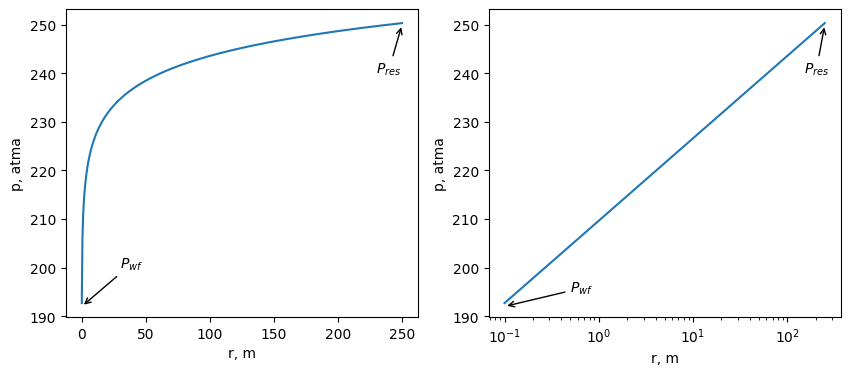

In [33]:
# формируем массив расстояний для которых будем проводить расчет
r_arr = np.linspace(0.1, 250, 500) 

# рассчитываем массив давлений на соответствующих расстояниях
# для расчета используется векторный расчет numpy - нет необходимости делать цикл в явном виде
p_arr = p_ss_atma(p_res_atma = 250,
                q_liq_sm3day = 50,
                mu_cP = 1,
                B_m3m3 = 1.2,
                k_mD = 15,
                h_m = 10,
                r_e = 240,
                r=r_arr)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [10,4])
ax1.plot(r_arr, p_arr)   # команда отрисовки графика по заданным массивам
ax2.plot(r_arr, p_arr)   # команда отрисовки графика по заданным массивам
ax2.set_xscale('log')
ax1.set_xlabel('r, m')
ax1.set_ylabel('p, atma')
ax2.set_xlabel('r, m')
ax2.set_ylabel('p, atma')

ax1.annotate("$P_{res}$",
            xy=(250, 250), xycoords='data',
            xytext=(230, 240), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

ax1.annotate("$P_{wf}$",
            xy=(0.1, 192), xycoords='data',
            xytext=(30, 200), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

            
ax2.annotate("$P_{res}$",
            xy=(250, 250), xycoords='data',
            xytext=(150, 240), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

ax2.annotate("$P_{wf}$",
            xy=(0.1, 192), xycoords='data',
            xytext=(0.5, 195), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

plt.savefig('pics/stac_pressure_dist_1.png', bbox_inches='tight', dpi=300)
plt.show()

# Радиус влияния скважины


Нестационарное решение в безразмерных переменных
$$ 
p_D(r_D,t_D) = - \frac{1}{2} Ei \left(- \dfrac{ r_D^2}{4t_d} \right)
\tag{1}
$$
где безразмерные переменные введены как
$$ r_D = \frac{r}{r_w} \tag{2} $$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2}  \tag{3}$$
$$ p_D = \frac{kh}{ 18.41 q_s B \mu} \left( p_i - p \right)  \tag{4} $$

Здесь использование единицы измерения СИ.
* $r_w$ - радиус скважины, м
* $r$ - расстояние от центра скважины до точки в пласте, м
* $q_s$ - дебит скважины на поверхности, приведенный к нормальным условиям м3/сут
* $\phi$ - пористость, доли единиц
* $\mu$ - вязкость нефти в пласте, сП
* $B$ - объемный коэффициент нефти, м3/м3
* $p_i$ - начальное давление в пласте, атм
* $p$ - давление на расстоянии $r$, атм
* $c_t$ - общая сжимаемость системы в пласте, 1/атм

Для этих же безразмерных переменных, считая начальное давление равным давлению на контуре можно записать стационарное решение для движения в круговом пласте

$$p_D = \ln r_{eD} - \ln r_D \tag{5}$$

сравним это решение с логарифмической аппроксимацией (1)

$$p_D(r_D,t_D) = - \frac{q_D}{2} \left[ \ln \left( \dfrac{ r_D^2}{4t_d} \right) +\gamma \right] \tag{5}$$

которое можно преобразовать к виду
$$p_D(r_D,t_D) = - q_D \ln r_D  + \frac{q_D}{2} \left[ \ln(4t_D)   -\gamma \right] \tag{6}$$

сравнивая со стационарным решением можно найти выражение безразмерного радиуса контура в зависимости от безразмерного времени
$$\ln r_{eD} = \frac{1}{2}(\ln(4t_D)-\gamma) \tag{7}$$

$$r_{eD} =  \sqrt { 4t_D e^{-\gamma} }  \tag{8}$$

наконец получим
$$r_{eD} = \sqrt {2.2458 t_D} \tag{9}$$

это значение называют радиусом влияния скважины. Используя это значение для определенного момента времени можно получить стационарное распределение давления в системе хорошо приближающее решение линейного стока работающего в бесконечном пласте. Можно считать это расстояние за расстояние на которое распространяется влияние скважины.

достижение радиуса влияния внешних границ будет обуславливать начало перехода от неустановившегося режима фильтрации к режиму обусловленному влиянием границ - стационарному для границы постоянного давления или псевдоустановившемуся для границы непротекания.

In [35]:
# оценим значение величины под корнем
print(4*np.exp(-0.57721566481))

2.2458379344731085


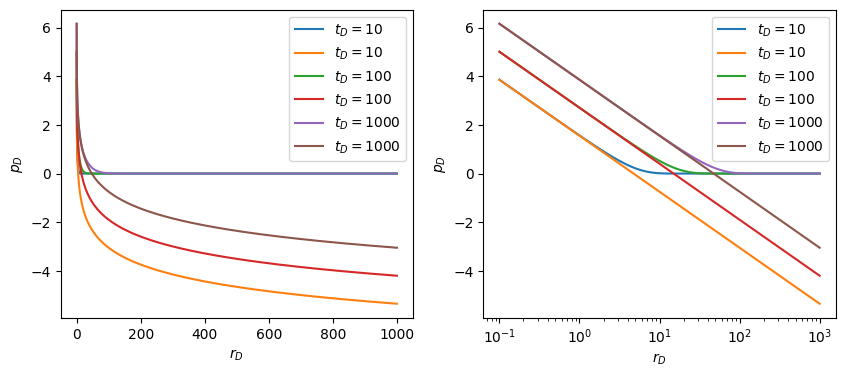

In [44]:
# Решение линейного стока уравнения фильтрации
def pd_ei(td, rd):
    """
    Решение линейного стока уравнения фильтрации
    rd - безразмерное расстояние
    td - безразмерное время
    """
    return -1/2*sc.expi(-rd**2 / 4 / td)


def pd_ss(rd, red):
  """
  стационарное решение в безразмерных переменных
  """
  return np.log(red/rd)

  # зададим точки расстояний для отрисовки графика
rdl = np.logspace(-1, 3 , 100)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [10,4])

# построим первый график в обычных координатах
for td in [10, 100, 1000]:
    ax1.plot(rdl, pd_ei(td, rdl), label=f'$t_D = {td}$')
    
    red = (td*2.2458)**0.5
    ax1.plot(rdl, pd_ss(rdl,red), label=f'$t_D = {td}$')


# построим второй график в полулогарифмических координатах
for td in [10, 100, 1000]:
    ax2.plot(rdl, pd_ei(td, rdl), label=f'$t_D = {td}$')
    
    red = (td*2.2458)**0.5
    ax2.plot(rdl, pd_ss(rdl,red), label=f'$t_D = {td}$')
ax2.set_xscale('log')

ax1.set_xlabel('$r_D$')
ax1.set_ylabel('$p_D$')
ax2.set_xlabel('$r_D$')
ax2.set_ylabel('$p_D$')
ax1.legend()
ax2.legend()

plt.savefig('pics/stac_radius_investigation_1.png', bbox_inches='tight', dpi=300)
plt.show()